In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(URL_,header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data = data[:100]
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
data = np.asmatrix(data, dtype = 'float64')

In [26]:
w = np.zeros(shape=(1, features.shape[1]+1)) #set weight to 0
w

NameError: ignored

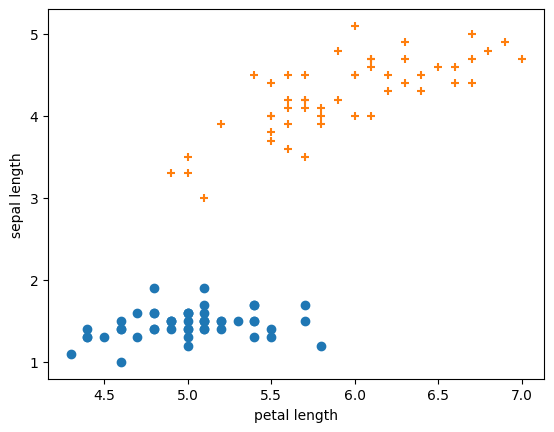

In [25]:
plt.scatter(np.array(data[:50,0]),np.array(data[:50,2]), marker = 'o',label = 'setosa')
plt.scatter(np.array(data[50:,0]),np.array(data[50:,2]), marker = '+',label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.show()

In [34]:
features = data[:, :-1]
labels = data[:, -1]

w = np.zeros(shape=(1, features.shape[1]+1)) #set weight to 0
w

array([[0., 0., 0., 0., 0.]])

In [37]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]

    w = np.zeros(shape=(1, features.shape[1]+1)) #set weight to 0

    misclassified_list= []


    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0

            delta = (label.item(0,0) - target)

            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)

        misclassified_list.append(misclassified)
    return (w, misclassified_list)
num_iter = 10
w, misclassified_list = perceptron(data, num_iter)


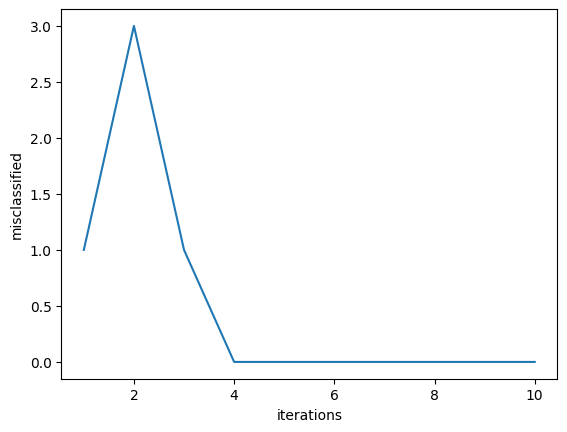

In [38]:
'''
A property of the Perceptron is
that if the dataset is linearly separable,
then the algorithm is guaranteed to converge at some point!
'''

epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_list)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()